# Riconoscere un moto Browniano: trova l'intruso

L'obiettivo di questo quaderno è quello di visualizzare un moto Browniano e familiarizzare con l'interfaccia di _Jupyter Notebok_.

L'interfaccia è divisa in blocchi che possono essere eseguiti indipendentemente ma in maniera additiva.

Anche questa sezione di testo è un blocco. Cliccandoci due volte sopra vedrete comparire il codice _Markdown_ usato per generarla. Premendo poi <kbd>Shift</kbd> + <kbd>Enter</kbd> ricompilerete il blocco, facendolo tornare nella sua visualizzazione "bella".

In _Jupyter Notebook_ si possono anche generare blocchi di codice eseguibili. La natura di ogni blocco viene selezionata nella barra degli strumenti in alto, mentre il linguaggio da utilizzare viene scelto dall'interprete, in alto a destra. 

Il prossimo blocco è codice _Python_ ed inizializza i pacchetti che utilizzeremo:
- `numpy` è il pacchetto fondamentale per operazioni con la matematica. Per esempio permette di fare la moltiplicazione tra vettori.
- `matplotlib` è il pacchetto fondamentale per generare grafici. `pyplot`è il modulo base per gestire i grafici.
- `ipywidgets` è un pacchetto per aggiungere a _Notebook_ alcuni _widget_ di comodità. `interactive` è il widget che permette di interagire con i grafici già creati, tra le varie cose, senza dover manualmente eseguire il codice.
- `rng = np.random.default_rng(seed=12346)` inizializza il generatore di numeri casuali. Specifichiamo il parametro `seed=12346` così che ogni esecuzione di questo codice produca sempre gli stessi risultati. Il numero `12346` di per sè non ha nulla di speciale.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, fixed

rng = np.random.default_rng(seed=12346)

## Esercizio 1: Graficare traiettorie
Come prima operazione proviamo a graficare delle traiettorie di moto Browniano già generate e contenute nel file `BrownianExample.json`. 

### Caricare il file
Il blocco seguente crea una funzione che permette di caricare delle traiettorie da un file.

`json` è un pacchetto che permette di lavorare, appunto, con i file `.json`. Questi sono stati creati per contenere delle variabili del programma sotto forma di testo e in modo leggibile dagli utenti. Il pacchetto permette all'utente di non preoccuparsi di come la variabile venga trasformata in testo o viceversa. In effetti per creare `BrownianExample.json` ho eseguito un programma che creasse una variabile con le traiettorie di un moto Browniano (vedremo poi come) ed ho eseguito `json.dump(...)` per trasformarle in testo e scriverle nel file. Utilizziamo adesso `json.load(...)`per l'operazione inversa. 

La variabile che si ottiene (e che useremo per tutte i file di traiettorie a seguire) è un dizionario `dict` di _Python_ di questo tipo:

```python
{
    'x': [0, ..., 1],
    'traj': [
        [0, ..., ],
        [0, ..., ],
        ... ,
        [0, ..., ]
    ]
}
```
dove sotto la chiave `x` troviamo le ascisse in dei punti in cui è stato simulato il moto browniano sotto forma di `list`, mentre sotto la chiave `traj` troviamo una `list` di _traiettorie_ dove ogni _traiettoria_ è a sua volta una `list` delle ordinate ottenute nella simulazione del moto browniano.

In [2]:
import json

def load_trajectories(filename):

    # legge le traiettorie da un file e le salva. La variabile "file" viene distrutta al termine dell'esecuzione del blocco "with"  
    with open(filename) as file:
        traj_dictionary = json.load(file)

    # separa le ascisse e le ordinate e le trasforma in un array numpy
    x = np.array(traj_dictionary['x'])
    ys = np.array(traj_dictionary['traj'])

    return x, ys

### Graficare il file
Similmente a come funziona per Matlab è possibile graficare sia vettori che matrici. Nel secondo caso sono le colonne che vengono interpretate come una serie di dati, quindi ad ogni colonna verrà associata una curva sul grafico.

Il blocco seguente ne dà un esempio senza preoccuparsi dell'aspetto. 

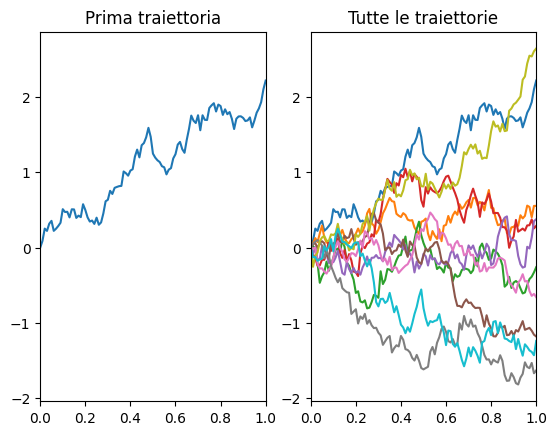

In [3]:
x, ys = load_trajectories('BrownianExample.json')

figure, axes = plt.subplots(1,2)  # Genera una figura contenente due assi in configurazione 1 riga e 2 colonne

# Grafichiamo la prima traiettoria simulata
single_traj_ax = axes[0]  # Gli assi del primo grafico
traj_to_plot = ys[0]
single_traj_ax.plot(x, traj_to_plot)

# Grafichiamo tutte le traiettorie simulate
all_traj_ax = axes[1]  # Gli assi del secondo grafico 
all_traj_ax.plot(x, np.transpose(ys))

# Diamo titoli ai grafici
all_traj_ax.set_title('Tutte le traiettorie')
single_traj_ax.set_title('Prima traiettoria')

# Impostiamo i limiti del'asse y del primo grafico come quelli del secondo
y_limits_all_traj = all_traj_ax.get_ybound()
single_traj_ax.set_ybound(y_limits_all_traj)

# Impostiamo i limiti dell'asse x in modo che siano precisi rispetto alle traiettorie
x_bounds = (x[0], x[-1])
single_traj_ax.set_xbound(x_bounds)
all_traj_ax.set_xbound(x_bounds)

### Migliorare il grafico
Non è sorprendente che i grafici precedenti possano essere migliorati. 

Per prima cosa si può aggiungere un `;` in fondo all'ultima istruzione, per sopprimere l'output che viene stampato a schermo.

Un altro esempio di miglioramento è contenuto nel seguente blocco di codice. 
```python
# Diamo titoli ai grafici
all_traj_ax.set_title('Tutte le traiettorie')
single_traj_ax.set_title('Prima traiettoria')

# Impostiamo i limiti del'asse y del primo grafico come quelli del secondo
y_limits_all_traj = all_traj_ax.get_ybound()
single_traj_ax.set_ybound(y_limits_all_traj)

# Impostiamo i limiti dell'asse x in modo che siano precisi rispetto alle traiettorie
x_bounds = (x[0], x[-1])
single_traj_ax.set_xbound(x_bounds)
all_traj_ax.set_xbound(x_bounds)
```
Inserendolo nel blocco precedente e rieseguendolo ne migliora l'aspetto. Altri modi per migliorare il grafico possono essere trovati chiedendo a _Google_ o cercando nella documentazione ufficiale di `matplotlib`, per esempio [qui][1] o [qui][2]

[1]: https://matplotlib.org/stable/api/axes_api.html#appearance
[2]: https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html

### Rendere il grafico interattivo
Uno degli aspetti più interessanti di _Jupyter Notebook_ è la possibilità di interagire con i grafici. L'esempio che vogliamo fare in questo caso è di cambiare quale traiettoria stiamo graficando singolarmente ed evidenziarla nel grafico con tutte le altre. 

Il primo passo è trasformare il processo di generazione del grafico in una funzione che abbia come input il parametro su cui vogliamo avere controllo. Le restanti operazioni sono essenzialmente invariate.

In [4]:
x_brownian, y_brownian = load_trajectories('BrownianExample.json')

def plot_ith_trajectory(i, xs, ys):
    figure, axes = plt.subplots(1,2)  # Genera una figura contenente due assi in configurazione 1 riga e 2 colonne

    # Grafichiamo la i-esima traiettoria simulata
    single_traj_ax = axes[0]  # Gli assi del primo grafico
    traj_to_plot = ys[i]
    single_traj_ax.plot(xs, traj_to_plot, color='red')
    
    # Grafichiamo tutte le traiettorie simulate
    all_traj_ax = axes[1]  # Gli assi del secondo grafico 
    lines = all_traj_ax.plot(xs, np.transpose(ys), color='blue')

    # Diamo titoli ai grafici
    all_traj_ax.set_title('Tutte le traiettorie')
    single_traj_ax.set_title(f'Traiettoria {i+1}')
    
    # Impostiamo i limiti del'asse y del primo grafico come quelli del secondo
    y_limits_all_traj = all_traj_ax.get_ybound()
    single_traj_ax.set_ybound(y_limits_all_traj)

    # Impostiamo i limiti dell'asse x in modo che siano precisi rispetto alle traiettorie
    x_bounds = (xs[0], xs[-1])
    single_traj_ax.set_xbound(x_bounds)
    all_traj_ax.set_xbound(x_bounds)

    # Camibamo la linea corrispondente nel grafico con tutte le traiettoria in modo che sia rossa e spessa 
    line_in_second_plot = lines[i]
    line_in_second_plot.set(color='red', linewidth=2)
    

L'ultimo passaggio è chiamare `interactive` fornendogli la funzione da usare e il range del parametro `i`da usare.

In [5]:
w = interactive(plot_ith_trajectory, i=(0, len(ys)-1), xs=fixed(x_brownian), ys=fixed(y_brownian))
w

interactive(children=(IntSlider(value=4, description='i', max=9), Output()), _dom_classes=('widget-interact',)…

## Esercizio 2: Gli intrusi
**Obiettivo:** individuare i motivi per cui certe simulazioni non sono, quasi certamente, estratte da un moto Browniano.

Ci sono a disposizione 4 file che, analogamente al caso di `BrownianExample.json`, contengono delle traiettorie simulate di alcuni processi stocastici che non sono il moto Browniano. L'esercizio consiste nel giustificare questo fatto, supportati da grafici e indagini tramite _Python_.

Ricordate che avete a disposizione ancora le funzioni che abbiamo definito nell'esercizio 1.

### 1° caso

**Obiettivo:** caricare le traiettorie contenute nel file `Traiettorie1.json`, graficarle e dedurre che non sono estratte da un moto Browniano

In [6]:
# Soluzione del 1° caso
x1, y1 = load_trajectories('Traiettorie1.json')

w = interactive(plot_ith_trajectory, i=(0, len(y1)-1), xs=fixed(x1), ys=fixed(y1))
w

interactive(children=(IntSlider(value=9, description='i', max=19), Output()), _dom_classes=('widget-interact',…

### 2° caso
**Obiettivo:** caricare le traiettorie contenute nel file `Traiettorie2.json`, graficarle e dedurre che non sono estratte da un moto Browniano. Sapete indovinare di quale processo stocastico siano?

_Suggerimento:_ potrebbe venire utile il comando [`hist`][1] di `matplotlib` per disegnare un istogramma o i metodi `x.mean()`, `x.std()` di `numpy` che calcolano media e deviazione standard, rispettivamente, di un vettore `x`.

[1]: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist

In [7]:
# Soluzione del 2° caso
x2, y2 = load_trajectories('Traiettorie2.json')

def plot_ith_trajectory(i,j,xs,ys):
    figure, axes = plt.subplots(1,3)  # Genera una figura contenente due assi in configurazione 1 riga e 2 colonne

    # Grafichiamo la i-esima traiettoria simulata
    single_traj_ax = axes[0]  # Gli assi del primo grafico
    traj_to_plot = ys[i]
    single_traj_ax.plot(xs, traj_to_plot, color='red')
    
    # Grafichiamo tutte le traiettorie simulate
    all_traj_ax = axes[1]  # Gli assi del secondo grafico 
    lines = all_traj_ax.plot(xs, np.transpose(ys), color='blue')

    # Istogramma
    hist_ax = axes[2]
    variable = ys[:,j]
    hist_ax.hist(variable, density=True)

    # Diamo titoli ai grafici
    all_traj_ax.set_title('Tutte le traiettorie')
    single_traj_ax.set_title(f'Traiettoria {i+1}')
    hist_ax.set_title(f'Passo {j}\nMedia:{variable.mean():.2f},\nVarianza{variable.std()**2:.2f}')
    
    # Impostiamo i limiti del'asse y del primo grafico come quelli del secondo
    y_limits_all_traj = all_traj_ax.get_ybound()
    single_traj_ax.set_ybound(y_limits_all_traj)

    # Impostiamo i limiti dell'asse x in modo che siano precisi rispetto alle traiettorie
    x_bounds = (xs[0], xs[-1])
    single_traj_ax.set_xbound(x_bounds)
    all_traj_ax.set_xbound(x_bounds)

    # Camibamo la linea corrispondente nel grafico con tutte le traiettorie in modo che sia rossa e spessa 
    line_in_second_plot = lines[i]
    line_in_second_plot.set(color='red', linewidth=2)

w = interactive(plot_ith_trajectory, i=(0, len(y2)-1), j=(0, y2.shape[1]-1), xs=fixed(x2), ys=fixed(y2))
w

interactive(children=(IntSlider(value=34, description='i', max=69), IntSlider(value=50, description='j'), Outp…

### 3° caso
**Obiettivo:** caricare le traiettorie contenute nel file `Traiettorie3.json`, graficarle e dedurre che non sono estratte da un moto Browniano.

In [8]:
# Soluzione del 3° caso
x3, y3 = load_trajectories('Traiettorie3.json')

w = interactive(plot_ith_trajectory, i=(0, len(y3)-1), j=(0, y3.shape[1]-1), xs=fixed(x3), ys=fixed(y3))
w

interactive(children=(IntSlider(value=34, description='i', max=69), IntSlider(value=50, description='j'), Outp…

### 4° caso
**Obiettivo:** caricare le traiettorie contenute nel file `Traiettorie4.json`, graficarle e dedurre che non sono estratte da un moto Browniano. Come si può mettere in evidenza la discrepanza riscontrata?

_Suggerimento:_ si può usare l'approccio del 2° caso oppure, in maniera più visiva, provare a disegnare dei _bound_ teorici per la maggior parte delle traiettorie. Ricordiamo, infatti, che se $X \sim \mathcal{N}(\mu,\sigma)$ si ha, con probabilità $\alpha$, che
$$ X \in [ \mu - z_{1-\alpha/2} \sqrt{\sigma}, \mu - z_{1-\alpha/2} \sqrt{\sigma} ] $$
dove $z_\alpha$ è il $\alpha$-quantile di una normale standard. In particolare per il moto Browniano $$ B_t \in [ -1.96 \sqrt{t}, 1.96\sqrt{t}]$$
con probabilità $95\%$.

In [9]:
# Soluzione del 4° caso
x4, y4 = load_trajectories('Traiettorie4.json')

def plot_ith_trajectory(i,j,xs,ys):
    figure, axes = plt.subplots(1,3)  # Genera una figura contenente due assi in configurazione 1 riga e 2 colonne

    # Grafichiamo la i-esima traiettoria simulata
    single_traj_ax = axes[0]  # Gli assi del primo grafico
    traj_to_plot = ys[i]
    single_traj_ax.plot(xs, traj_to_plot, color='red')
    
    # Grafichiamo tutte le traiettorie simulate e i gli estremi al 95% di ogni variabile aleatorie
    all_traj_ax = axes[1]  # Gli assi del secondo grafico 
    lines = all_traj_ax.plot(xs, np.transpose(ys), color='blue')
    all_traj_ax.plot(xs, -1.97*np.sqrt(xs),xs, 1.97*np.sqrt(xs), color='orange', linewidth=2)

    # Istogramma
    hist_ax = axes[2]
    variable = ys[:,j]
    hist_ax.hist(variable, density=True)

    # Diamo titoli ai grafici
    all_traj_ax.set_title('Tutte le traiettorie')
    single_traj_ax.set_title(f'Traiettoria {i+1}')
    hist_ax.set_title(f'Passo {j}\nMedia:{variable.mean():.2f},\nVarianza{variable.std()**2:.2f}')
    
    # Impostiamo i limiti del'asse y del primo grafico come quelli del secondo
    y_limits_all_traj = all_traj_ax.get_ybound()
    single_traj_ax.set_ybound(y_limits_all_traj)

    # Impostiamo i limiti dell'asse x in modo che siano precisi rispetto alle traiettorie
    x_bounds = (xs[0], xs[-1])
    single_traj_ax.set_xbound(x_bounds)
    all_traj_ax.set_xbound(x_bounds)

    # Camibamo la linea corrispondente nel grafico con tutte le traiettorie in modo che sia rossa e spessa 
    line_in_second_plot = lines[i]
    line_in_second_plot.set(color='red', linewidth=2, zorder=10)

w = interactive(plot_ith_trajectory, i=(0, len(y4)-1), j=(0, y4.shape[1]-1), xs=fixed(x4), ys=fixed(y4))
w

interactive(children=(IntSlider(value=49, description='i', max=99), IntSlider(value=50, description='j'), Outp…

## Esercizio 3: Generare un moto Browniano
**Obiettivo:** generare una funzione che simuli delle traiettorie di un moto Browniano.
Nel blocco di codice qui sotto è già presente il prototipo della funzione, con la descrizione di cosa ci si aspetta in input e cosa invece ci si aspetta in output.

Per simulare le traiettorie ricordiamo le proprietà del moto Browniano $(B_t)_t$:
- $B_0 = 0$
- $B_t(\omega)$ è continua in $t$
- $B_t - B_s \sim \mathcal{N}(0,t-s)$ se  $t>s$ ed è indipendente da $B_s$.

### Primo tentativo
**Obiettivo:** scrivere una funzione che simuli le traiettorie di un moto Browniano e graficarne i risultati (utilizzando le funzione create nell'esercizio 1).
Potrebbe essere utile ricordarvi le seguenti sintassi di _Python_.

#### **Aggiungere elementi ad una lista**
Per aggiungere un numero `n` ad una lista `x` si può usare
```python
x.append(n)
```
#### **Iterazioni**
La sintassi del ciclo `for` in _Python_, per ripetere 10 volte un'operazione è la seguente
```python
for i in range(10):
    ...
```
e in questo caso `i` varierà tra $0, \dots, 9$. Per esempio, la seguente espression
```python
tabellina_2 = []
for i in range(10):
    tabellina_2.append(2*i)
```
produce `tabellina_2=[0, 2, 4, ..., 18]`.
Può venire utile la sintassi di _Python_ che permette di iterare lungo una lista, senza necessità di ricorrere agli indici esplicitamente ovvero
```python
for i in tabellina_2:
    ...
```
dove `i` prenderà quindi valori $[0, 2, \dots, 18]$.

#### **Generazione di numeri casuali**
Il comando per generare un numero casuale da una distribuzione normale, avendo già definito un generatore `rng` ad inizio documento, è
```python
rng.normal(loc, scale)
```
dove `loc`  e `scale` sono la media e la deviazione standard della distribuzione.

#### **ATTENZIONE**
Se state usando il Binder siete limitati da 10MB di memoria di sistema e ogni `float` occupa 8 byte di spazio.

In [19]:
def generate_brownian_trajectories(n_trajectories=1000, endpoint=1, n_intervals=100):
    '''
    genera n_trajectories traiettorie di un moto Browniano nell'intervallo [0, endpoint].

    Parameters
    ----------
    n_trajectories: numero di traiettorie  da simulare
    endpoint: l'ultimo tempo per cui verrà simulato il moto Browniano
    n_intervals: il numero di intervalli nella partizione di [0, endpoint]

    Returns
    -------
    x: array dei punti della partizione [0,endpoint] su cui viene simulato il moto Browniano
    ys: matrice che ha per righe le traiettorie di un moto Browniano, valutate sui punti di x
    '''
    step_length = endpoint / n_intervals

    ys = np.cumsum(np.append(np.zeros((n_trajectories, 1)), rng.normal(0, np.sqrt(step_length), size=(n_trajectories, n_intervals)), axis=1) , axis=1)
    x = np.linspace(0, endpoint, n_intervals+1)

    return x, ys

### Secondo tentativo: ottimizzare il codice
Molte delle operazioni precedenti possono essere rese più efficienti/leggibili. 

**Obiettivo:** ripetere l'obiettivo precedenti implementando i suggerimenti seguenti.
#### **Generazione delle x**
La lista contenente la partizione dei tempi può essere generata in tramite quella che si chiama _list comprehension_ con un comando del tipo
```python
x = [i*timestep for i in range(n_steps)]
```
che una lista del tipo `x=[0, timestep, 2*timestep, 3*timestep, ..., n_step*timestep]`.
Ancora meglio però è usare la funzione `linspace` del pacchetto `numpy`, la cui documentazione è [qui][1] e che ha una sintassi di questo tipo
```python
np.linspace(start, end, num)
```

#### **Generazione di numeri casuali bis**
La generazione di numeri causali può essere estesa anche alle matrici! La sintassi diventa
```python
rng.normal(loc, scale, shape)
```
dove `shape` è una _tupla_ $(i,j)$ con le dimensioni della matrice.

#### **Eliminare tutti i cicli**
Dopo aver eliminato il ciclo esplicito per generare la partizione dei tempi, può essere utile eliminare anche il ciclo per creare le traiettorie. A questo scopo suggerisco di provare ad utilizzare la funzione `cumsum` del pacchetto `numpy`, la cui documentazione è [qui][2].
Per completare la richiesta potrebbero anche venire utili, in maniera accidentale, anche [`np.zeros`][3] e [`np.concat`][4].


[1]: https://numpy.org/doc/stable/reference/generated/numpy.linspace.html#numpy.linspace 
[2]: https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html#numpy-cumsum
[3]: https://numpy.org/doc/stable/reference/generated/numpy.zeros.html#numpy.zeros
[4]: https://numpy.org/doc/stable/reference/generated/numpy.concat.html#numpy-concat

In [7]:
xb1,yb1 = generate_brownian_trajectories(n_trajectories=1, endpoint=1, n_intervals=100)

w = interactive(plot_ith_trajectory, i=(0, len(yb1)-1), j=(0, yb1.shape[1]-1), xs=fixed(xb1), ys=fixed(yb1))
w

interactive(children=(IntSlider(value=74, description='i', max=149), IntSlider(value=50, description='j'), Out…

In [18]:
import timeit

n_trajectories=1000
repetitions = 1000

def iterated_generation(trajectories=1000, end_time=1, n_intervals=100):
    y = []
    x=[0]
    timestep = end_time/n_intervals
    for n_traj in range(trajectories):
        traj = [0]
        for n_timestep in range(n_intervals):
            traj.append(traj[-1]+rng.normal(0,np.sqrt(timestep)))
        y.append(traj)
    for n_timestep in range(n_intervals):
            x.append(x[-1]+timestep)
    return x,y

time_iterations_taken = timeit.timeit(iterated_generation, number=repetitions)
time_iterations_taken/repetitions

0.057409478584071624

In [20]:
time_generation_taken = timeit.timeit(generate_brownian_trajectories, number=repetitions)
time_generation_taken/repetitions

0.0006939883749000728